# Unsupervised Topic modelling

In [ ]:
! pip install --quiet bertopic
! pip install --quiet underthesea
! pip install --quiet pyLDAvis
! pip install --quiet top2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.7 MB/s eta 0:00:00


In [ ]:
from distutils.dir_util import copy_tree
copy_tree("/content/drive/MyDrive/Thesis: Topic Modelling/Code/utils", "./utils/")

['./utils/vietnamese-stopwords.txt',
 './utils/bertopic_model/topic_embeddings.safetensors',
 './utils/bertopic_model/topics.json',
 './utils/bertopic_model/config.json',
 './utils/bertopic_model/ctfidf.safetensors',
 './utils/bertopic_model/ctfidf_config.json',
 './utils/vncorenlp/models/dep/vi-dep.xz',
 './utils/vncorenlp/models/ner/vi-ner.xz',
 './utils/vncorenlp/models/ner/vi-500brownclusters.xz',
 './utils/vncorenlp/models/ner/vi-pretrainedembeddings.xz',
 './utils/vncorenlp/models/postagger/vi-tagger',
 './utils/vncorenlp/models/wordsegmenter/wordsegmenter.rdr',
 './utils/vncorenlp/models/wordsegmenter/vi-vocab',
 './utils/vncorenlp/VnCoreNLP-1.2.jar',
 './utils/data_preprocessing.py',
 './utils/data_preprocessing_v2.py',
 './utils/__pycache__/data_preprocessing_v2.cpython-310.pyc']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from underthesea import word_tokenize
from utils.data_preprocessing_v2 import *
import pyLDAvis
import pyLDAvis.gensim

with open("/content/drive/MyDrive/Thesis: Topic Modelling/Code/utils/vietnamese-stopwords.txt") as f:
    STOPWORDS = f.readlines()
    STOPWORDS = [remove_all_tag(i).strip() for i in STOPWORDS]
STOPWORDS.extend(["negative", "positive"])

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Thesis: Topic Modelling/Data/final_data_v2.xlsx")
data["comment"] = data["comment"].astype(str)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quality,Serve,Pack,Shipping,Price,Other,rating,comment
0,1,0,1,0,0,0,3,Chất lượng sản phẩm:được\n\nĐóng gói ko cẩn th...
1,1,0,0,1,0,0,4,Đúng với mô tả:đúng\nChất lượng sản phẩm:oke\n...
2,1,0,0,1,0,0,5,Nhận hàng nhanh\nHàng như ảnh\n*hình ảnh và vi...
3,1,0,0,1,1,0,4,"Mặc dù sản phẩm ổn, giá tốt nhưng chuẩn bị hàn..."
4,1,0,0,1,1,0,4,Chất liệu:lụa\nĐúng với mô tả:đúng\nMàu sắc:đe...


# 1. Data preprocessing

In [ ]:
df = data.copy()
df["comment"] = df["comment"].apply(lambda x: cleaning(x))
data_words = list(df["comment"].apply(lambda x: word_tokenize(x)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df["comment"][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'chất lượng sản phẩm được đóng gói không cẩn thận'

# 2. LDA model

In [ ]:
data_words_without_stopwords = []
for reviews in data_words:
  new_reviews = [i.strip() for i in reviews if i.strip() not in STOPWORDS]
  data_words_without_stopwords.append(new_reviews)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dictionary = corpora.Dictionary(data_words_without_stopwords)
corpus = [dictionary.doc2bow(text) for text in data_words_without_stopwords]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models.ldamodel import LdaModel

lda = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10, random_state = 60, per_word_topics=True)
topics = lda.print_topics(num_words=10)
for i, topic in enumerate(topics):
    print(i + 1, topic[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1 0.126*"hàng" + 0.086*"giao" + 0.056*"cửa hàng" + 0.028*"đóng gói" + 0.021*"đẹp" + 0.020*"mua" + 0.017*"cẩn thận" + 0.016*"shop" + 0.016*"ủng hộ" + 0.015*"sản phẩm"
2 0.041*"đeo" + 0.030*"dán" + 0.028*"h" + 0.023*"miếng" + 0.021*"hộp" + 0.018*"móp" + 0.017*"number_m" + 0.015*"to" + 0.015*"chống" + 0.014*"méo"
3 0.017*"the" + 0.017*"k" + 0.016*"giúp" + 0.015*"tiếng" + 0.011*"mẹ" + 0.010*"in" + 0.010*"to" + 0.010*"bé" + 0.009*"mic" + 0.009*"thiết kế"
4 0.097*"sản phẩm" + 0.087*"chất lượng" + 0.081*"ok" + 0.064*"hàng" + 0.048*"giao" + 0.047*"giá" + 0.031*"ổn" + 0.025*"mô tả" + 0.021*"tiền" + 0.020*"đóng gói"
5 0.044*"mua" + 0.025*"đẹp" + 0.024*"đi" + 0.023*"cỡ" + 0.023*"lắm" + 0.019*"cửa hàng" + 0.019*"number_k" + 0.016*"tiền" + 0.015*"giá" + 0.015*"nha"
6 0.270*"number_" + 0.055*"tai" + 0.022*"xu" + 0.020*"hình ảnh" + 0.015*"tính chất" + 0.013*"mua" + 0.008*"number_k" + 0.006*"ko" + 0.006*"number_đ" + 0.006*"shope"
7 0.048*"number_" + 0.044*"cửa hàng" + 0.035*"mua" + 0.025*"hàng" + 0.02

Topic 1: mainly concenrns the customer service quality (deliveries, response time, returning products or gifts) \\
Topic 2, 6: Packaging and the apperance of the product \\
Topic 3, 4, 5, 9: Product quality \\
Topic 10: Price \\
Topic 8: Spam of miscellaneous \\


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2.2. Evaluate LDA model

In [ ]:
print('\nPerplexity: ', lda.log_perplexity(corpus)) # lower perplexity = better
coherence_model_lda = CoherenceModel(model=lda, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence() # higher score = better
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.649288527249112

Coherence Score:  0.4543829078692651


# 3. Bertopic model

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from umap import UMAP

umap_model = UMAP(metric='cosine', random_state = 45)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [ ]:
vectorizer_model = TfidfVectorizer(stop_words=STOPWORDS, tokenizer=word_tokenize, min_df = 0.2)
topic_model = BERTopic(vectorizer_model=vectorizer_model, language="multilingual", nr_topics="auto", umap_model = umap_model)
topics, probs = topic_model.fit_transform(df["comment"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)
/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)


In [ ]:


freq = topic_model.get_topic_info()
freq.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,5299,-1_chất lượng_sản phẩm_cửa hàng_hàng,"[chất lượng, sản phẩm, cửa hàng, hàng, giao, m...",[chất lượng sản phẩm sử dụng ok đúng với mô tả...
1,0,5260,0_cửa hàng_chất lượng_sản phẩm_ủng hộ,"[cửa hàng, chất lượng, sản phẩm, ủng hộ, giao,...",[chất lượng sản phẩm ok đúng với mô tả như ảnh...
2,1,3400,1_chất liệu_vải_đen_màu,"[chất liệu, vải, đen, màu, mô tả, trắng, mỏng,...",[chất liệu vải bố màu sắc đen đúng với mô tả c...
3,2,704,2_tai_âm thanh_tiếng_rè,"[tai, âm thanh, tiếng, rè, đeo, loa, kém, to, ...","[tai nghe không ra gì cả, number_ bên tai khôn..."
4,3,555,3_h_s_k_n,"[h, s, k, n, c, xu, ngon, ok, e, t]",[ánh h sjsbsbh dính sua ah sua ưu sua hận ấu c...
5,4,231,4_pin_sạc_chạy_quạt,"[pin, sạc, chạy, quạt, tiếng, xài, yếu, kém, n...","[dung lượng pin thấp za, mới xài xíu là hết pi..."
6,5,227,5_da_thơm_mặt_khô,"[da, thơm, mặt, khô, cẩn thận, thân thiện, đón...",[công dụng rửa mặt mùi hương nhẹ dịu dành cho ...
7,6,159,6_ngon_mẫu mã_bao bì_cẩn thận,"[ngon, mẫu mã, bao bì, cẩn thận, thơm, đóng gó...",[hương vị ngon bao bì mẫu mã đẹp giao hàng nha...
8,7,79,7_kết nối_tai_kém_âm thanh,"[kết nối, tai, kém, âm thanh, cắm, pin, bật, s...",[giao hàng nhanh đóng gói cẩn thận âm thanh ng...
9,8,73,8_dây_cứng_đeo_tội,"[dây, cứng, đeo, tội, sạc, tạm, mềm, tuột, lỏn...","[dây bị hỏg rồi, dây xinh đẹp, dùng dây zin vẫ..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
topic_model.visualize_barchart()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(df["comment"])
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics, top_n_topics = 20, color_threshold = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

100%|██████████| 45/45 [00:00<00:00, 265.39it/s]
/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure

In [ ]:
count_vectorizer_model = CountVectorizer(stop_words="english", min_df=10)
topic_model.update_topics(df["comment"], vectorizer_model=count_vectorizer_model)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# 4. Analyzing one specific product

In [ ]:
PRODUCT_URL = "https://shopee.vn/Áo-Khoác-Nỉ-Nam-Dài-Tay-Khóa-Kéo-Có-Mũ-Trùm-Họa-Tiết-Chữ-K-Zenkonam-MEN-JK-034-i.16580423.17780338318?sp_atk=605f3f1e-1473-4b30-a98b-cbc525162774&xptdk=605f3f1e-1473-4b30-a98b-cbc525162774"

## 4.1. Crawl data

In [ ]:
"""
from Shopee_crawl import ShopeeCrawler
crawler = ShopeeCrawler()
shop_id, item_id = crawler.get_ids_from_link(PRODUCT_URL)
reviews = crawler.Crawl(item_id = item_id, shop_id = shop_id)
reviews_df = pd.DataFrame(reviews)
reviews_df = reviews_df[reviews_df['comment'].str.len() > 0]
reviews_df
reviews_df.to_excel("/content/drive/MyDrive/Thesis: Topic Modelling/Data/Ao_khoac.xlsx", index = False)
"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'\nfrom Shopee_crawl import ShopeeCrawler\ncrawler = ShopeeCrawler()\nshop_id, item_id = crawler.get_ids_from_link(PRODUCT_URL)\nreviews = crawler.Crawl(item_id = item_id, shop_id = shop_id)\nreviews_df = pd.DataFrame(reviews)\nreviews_df = reviews_df[reviews_df[\'comment\'].str.len() > 0]\nreviews_df\nreviews_df.to_excel("/content/drive/MyDrive/Thesis: Topic Modelling/Data/Ao_khoac.xlsx", index = False)\n'

In [ ]:
reviews_df = pd.read_excel("/content/drive/MyDrive/Thesis: Topic Modelling/Data/Ao_khoac.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
reviews_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,itemid,shopid,username,rating,time,source,comment
0,16580423,17780338318,je_ni_fo_dat,5,1705481009,Shopee,Hài lòng về dich vụ và chất liệu sản phẩm rất ...
1,16580423,17780338318,_rodht825l,5,1659103218,Shopee,"Vải đẹp, áo khoác gió. Tránh mưa nắng được, mà..."
2,16580423,17780338318,ngo_ba_kien,5,1697112846,Shopee,"sản phẩm đẹp, chất liệu tốt, shop uy tín miễn ..."
3,16580423,17780338318,ngo_ba_kien,5,1705477000,Shopee,"shop giao hàng nhanh, gói hàng cẩn thận, sản p..."
4,16580423,17780338318,madmeowmeow,5,1675015660,Shopee,"Chất liệu:Tốt, mặc thoáng\nMàu sắc:Đẹp, mình đ..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<BarContainer object of 5 artists>

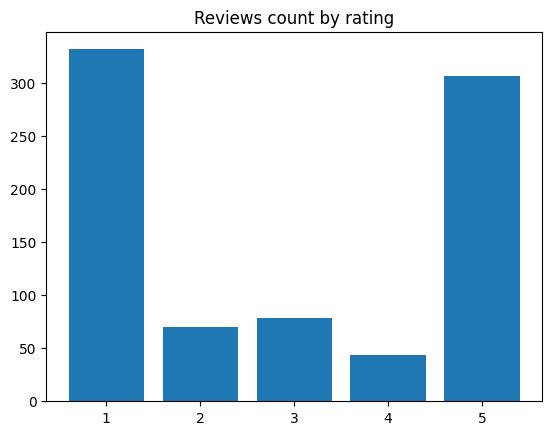

In [ ]:
reviews_count_by_rating = reviews_df.groupby("rating")["time"].count()
plt.title("Reviews count by rating")
plt.bar(x = reviews_count_by_rating.index, height = reviews_count_by_rating.values)

# 4.2 Preprocessing data

In [ ]:
clean_reviews_df = pd.DataFrame()
clean_reviews_df["comment"] = reviews_df["comment"].apply(lambda x: cleaning(x))
data_words = list(clean_reviews_df["comment"].apply(lambda x: word_tokenize(x)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
clean_reviews_without_stopwords = []
for reviews in data_words:
  new_reviews = [i.strip() for i in reviews if i.strip() not in STOPWORDS]
  clean_reviews_without_stopwords.append(new_reviews)

dictionary = corpora.Dictionary(clean_reviews_without_stopwords)
corpus = [dictionary.doc2bow(text) for text in clean_reviews_without_stopwords]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# 4.3 Choose optimal number of topics

In [ ]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit

    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, random_state = 60, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())

    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()

    return lm_list, c_v

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



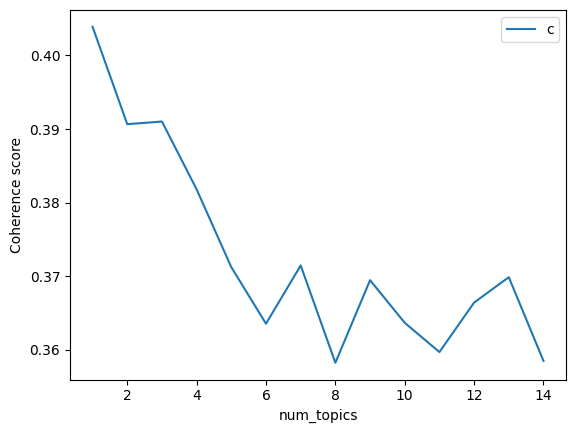

In [ ]:
evaluation = evaluate_graph(dictionary, corpus, texts = data_words, limit = 15)

In [ ]:
lda = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10, random_state = 60, per_word_topics=True, update_every=1, alpha = "auto")
topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(0, '0.074*"mô tả" + 0.062*"chất liệu" + 0.056*"màu sắc" + 0.031*"áo" + 0.023*"mỏng" + 0.022*"mua" + 0.021*"vải" + 0.021*"trắng" + 0.020*"đen" + 0.018*"hàng"')
(1, '0.051*"cửa hàng" + 0.043*"hàng" + 0.032*"giao" + 0.020*"đẹp" + 0.018*"mua" + 0.016*"kiểu" + 0.013*"hình ảnh" + 0.013*"đồ" + 0.013*"chất liệu" + 0.012*"shop"')
(2, '0.110*"màu" + 0.046*"màu sắc" + 0.045*"trắng" + 0.045*"sai" + 0.045*"mô tả" + 0.045*"giao" + 0.043*"vàng" + 0.041*"chất liệu" + 0.030*"áo" + 0.025*"hàng"')


In [ ]:
topics=[]
topic_terms=[]
for idx in range(3):
    topics.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda.get_topic_terms(idx,topn=10):
        terms.append(dictionary[term[0]])
    topic_terms.append(terms)

for idx in range(3):
    print(topics[idx],topic_terms[idx])

Main topics in the reviews are related to product's color, material. Topic 3 may be related to the fact that customer received the product in wrong colors.

In [ ]:
print('\nPerplexity: ', lda.log_perplexity(corpus)) # lower perplexity = better
coherence_model_lda = CoherenceModel(model=lda, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence() # higher score = better
print('\nCoherence Score: ', coherence_lda)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
vis